In [1]:
from package import process_dataset
from package import encoder
from package import models

import numpy as np

from sklearn.model_selection import train_test_split
import pandas as pd

Loaded  7 encoders.


/home/gustavo/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/gustavo/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
description = pd.read_csv("data/dicionario.csv", encoding='latin-1')
train = pd.read_csv("data/dados_treino_hackaton.csv", encoding='latin-1', index_col=False)
test = pd.read_csv("data/dados_teste_x_hackaton.csv", encoding='latin-1', index_col=False)

del train['Unnamed: 0']
del test['Unnamed: 0']

In [3]:
columns_to_sum = ['Software', 'Comissão sobre Parceiros', 'Cybersecurity',
       'Desdobramento de metas', 'ESG', 'Equilíbrio fiscal', 'Skill_dev',
       'Gestão Estratégica', 'Gestão da Educação', 'Gestão da Operação',
       'Gestão da Receita', 'Gestão da Saúde', 'Gestão da Segurança Pública',
       'Gestão da Segurança Viária', 'Gestão de Gastos',
       'Gestão de operações projetizadas', 'Gestão de pessoas',
       'Processes Excellence', 'Produtos digitais', 'S_amp_OP_S_amp_OE',
       'Transformação Digital', 'Treinamentos', 'Roadmap']

In [4]:
train = encoder.encode_DataFrame(train)
train = process_dataset.processColumns(train)

In [30]:
train["num_solucoes"] = s

In [6]:
train

,Classificacao_da_Oportunidade,Faixa_de_Faturamento_Agregado,Data_Real_de_Encerramento_da_Opp2,id_fechou,numero_relacionamentos,numero_relacionamentos_convertidos,intervalo_tempo,Valor_corrigido2,Forma_de_Contratacao_Agregado,Desdobramento de metas,...,Segmentacao,Carteira_Nova,Segmento_Agregado2,Total_HH,Custo_Total,Margem_Total,Custo_Total_per_Valor_corrigido2,numero_relacionamentos_convertidos_per_numero_relacionamentos,Gestão da Receita_per_Gestão de Gastos,num_solucoes
0,0,6,0,1,1,0,0.00,5.035363e+05,0,1,...,2,5,20,115.0,151368.42,0.567519,0.300611,0.000000,0,1.0
1,1,5,1,1,2,1,2.03,6.186303e+05,3,0,...,0,0,5,205.0,183543.74,0.573154,0.296694,0.500000,1,1.0
2,2,0,2,0,8,5,6.27,2.700289e+06,3,0,...,1,5,16,472.0,725715.00,0.615311,0.268755,0.625000,0,1.0
3,0,6,3,1,1,0,0.00,4.580399e+04,0,0,...,0,1,9,4.0,24540.16,0.233120,0.535765,0.000000,0,1.0
4,2,0,4,1,6,5,4.37,4.424331e+06,3,0,...,0,3,18,691.0,1639159.66,0.545262,0.370488,0.833333,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,5,278,0,3,0,19.43,9.431257e+05,0,0,...,0,2,18,302.0,380656.50,0.470575,0.403612,0.000000,0,1.0
609,1,0,278,0,2,0,38.53,2.557851e+05,0,0,...,3,5,15,62.0,103393.16,0.469779,0.404219,0.000000,0,1.0
610,2,6,279,0,2,1,27.67,2.832343e+05,3,1,...,3,5,11,91.0,113290.31,0.475328,0.399988,0.500000,0,1.0
611,0,2,280,0,1,0,0.00,1.695306e+06,0,0,...,0,1,3,384.0,543069.12,0.579808,0.320337,0.000000,0,1.0


In [7]:
train_cols, target = process_dataset.generate_labels(train)

In [8]:
X = process_dataset.scaleData(train[train_cols], useSaved=False)
y = train[target]

In [67]:
#podemos variar o test_size de 0.1 até 0.2 ver como os modelos treinam melhor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## Linear regression

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lin = LinearRegression()

In [71]:
lin.fit(X_train, y_train)

LinearRegression()

In [72]:
pred = lin.predict(X_test)

In [73]:
ypred = models.convertPredicted(pred)

models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        36
           1       0.90      0.73      0.81        26

    accuracy                           0.85        62
   macro avg       0.87      0.84      0.85        62
weighted avg       0.86      0.85      0.85        62

Accuracy score:  0.8548387096774194
Mean Squared Error:  0.14516129032258066
roc_auc score:  0.8376068376068376





In [74]:
import matplotlib.pyplot as plt

In [75]:
from sklearn.metrics import confusion_matrix, roc_curve, classification_report

In [76]:
import ast

In [77]:
classification_report(y_test, ypred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.94      0.88        36\n           1       0.90      0.73      0.81        26\n\n    accuracy                           0.85        62\n   macro avg       0.87      0.84      0.85        62\nweighted avg       0.86      0.85      0.85        62\n'

In [78]:
#ast.literal_eval(str(confusion_matrix(y_test, ypred)).replace(" ", ","))

In [79]:
fpr, tpr, _  = roc_curve(y_test,  pred)

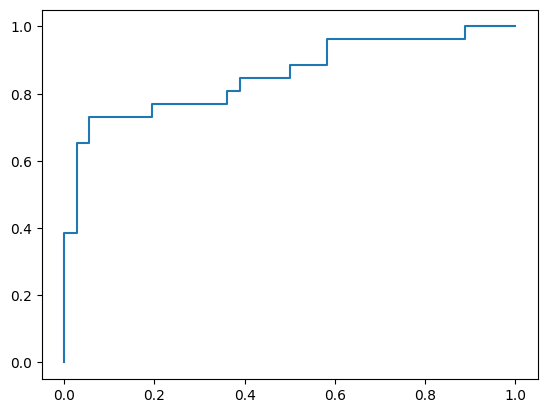

In [80]:
plt.plot(fpr,tpr)

## Decision tree regressor

In [81]:
from sklearn.tree import DecisionTreeRegressor

In [82]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [83]:
models.run_analysis(tree.predict(X_test), y_test)

              precision    recall  f1-score   support

           0       0.64      0.69      0.67        36
           1       0.52      0.46      0.49        26

    accuracy                           0.60        62
   macro avg       0.58      0.58      0.58        62
weighted avg       0.59      0.60      0.59        62

Accuracy score:  0.5967741935483871
Mean Squared Error:  0.4032258064516129
roc_auc score:  0.577991452991453





## Random Forest Regressor

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [86]:
ypred = models.convertPredicted(forest.predict(X_test))

In [87]:
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.71      0.75      0.73        36
           1       0.62      0.58      0.60        26

    accuracy                           0.68        62
   macro avg       0.67      0.66      0.66        62
weighted avg       0.67      0.68      0.68        62

Accuracy score:  0.6774193548387096
Mean Squared Error:  0.3225806451612903
roc_auc score:  0.6634615384615384





## Testing polynomial regressor

In [88]:
from sklearn.preprocessing import PolynomialFeatures

In [89]:
p = PolynomialFeatures(degree = 3, include_bias=False)

In [90]:
pX_train = p.fit_transform(X_train)

In [91]:
lin = LinearRegression()
lin.fit(pX_train, y_train)

LinearRegression()

In [92]:
pred = lin.predict(p.transform(X_test))
ypred = models.convertPredicted(pred)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.64      0.64      0.64        36
           1       0.50      0.50      0.50        26

    accuracy                           0.58        62
   macro avg       0.57      0.57      0.57        62
weighted avg       0.58      0.58      0.58        62

Accuracy score:  0.5806451612903226
Mean Squared Error:  0.41935483870967744
roc_auc score:  0.5694444444444444





## SGD Regression

In [93]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

from sklearn.base import clone

In [94]:
sgd = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

In [95]:
minimal_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(6000):
    sgd.fit(X_train, y_train)
    y_val_pred = sgd.predict(X_test)
    val_error = mean_squared_error(y_test, y_val_pred)
    if val_error < minimal_error:
        minimal_error = val_error
        best_epoch = epoch
        best_model = clone(sgd)


In [96]:
ypred = models.convertPredicted(sgd.predict(X_test))
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        36
           1       0.90      0.73      0.81        26

    accuracy                           0.85        62
   macro avg       0.87      0.84      0.85        62
weighted avg       0.86      0.85      0.85        62

Accuracy score:  0.8548387096774194
Mean Squared Error:  0.14516129032258066
roc_auc score:  0.8376068376068376





## Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
log = LogisticRegression()

In [99]:
log.fit(X_train, y_train)

LogisticRegression()

In [100]:
ypred = log.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        36
           1       0.90      0.73      0.81        26

    accuracy                           0.85        62
   macro avg       0.87      0.84      0.85        62
weighted avg       0.86      0.85      0.85        62

Accuracy score:  0.8548387096774194
Mean Squared Error:  0.14516129032258066
roc_auc score:  0.8376068376068376





## Support vector machines

In [101]:
from sklearn.svm import LinearSVC

In [102]:
svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC()

In [103]:
ypred = svm.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        36
           1       0.90      0.73      0.81        26

    accuracy                           0.85        62
   macro avg       0.87      0.84      0.85        62
weighted avg       0.86      0.85      0.85        62

Accuracy score:  0.8548387096774194
Mean Squared Error:  0.14516129032258066
roc_auc score:  0.8376068376068376





In [104]:
from sklearn.svm import SVC

In [105]:
svm = SVC(kernel='poly', C=10)
svm.fit(X_train, y_train)

SVC(C=10, kernel='poly')

In [106]:
ypred = svm.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.71      0.81      0.75        36
           1       0.67      0.54      0.60        26

    accuracy                           0.69        62
   macro avg       0.69      0.67      0.67        62
weighted avg       0.69      0.69      0.69        62

Accuracy score:  0.6935483870967742
Mean Squared Error:  0.3064516129032258
roc_auc score:  0.6720085470085471





## Decision tree classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [54]:
ypred = tree.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.63      0.82      0.71        62
           1       0.74      0.51      0.60        61

    accuracy                           0.67       123
   macro avg       0.68      0.67      0.66       123
weighted avg       0.68      0.67      0.66       123

Accuracy score:  0.6666666666666666
Mean Squared Error:  0.3333333333333333
roc_auc score:  0.6653886832363828





In [55]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

In [56]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

In [57]:
voting = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard'
)
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [58]:
ypred = voting.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.61      0.66      0.64        62
           1       0.62      0.57      0.60        61

    accuracy                           0.62       123
   macro avg       0.62      0.62      0.62       123
weighted avg       0.62      0.62      0.62       123

Accuracy score:  0.6178861788617886
Mean Squared Error:  0.3821138211382114
roc_auc score:  0.617530407191962





In [59]:
import xgboost

In [60]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [61]:
ypred = xgb.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.65      0.65      0.65        62
           1       0.64      0.64      0.64        61

    accuracy                           0.64       123
   macro avg       0.64      0.64      0.64       123
weighted avg       0.64      0.64      0.64       123

Accuracy score:  0.6422764227642277
Mean Squared Error:  0.35772357723577236
roc_auc score:  0.6422527763088313





In [62]:
xgb = xgboost.XGBClassifier(
        max_depth=2,
        gamma=0.1,
        eta=1.5,
        reg_alpha=1.1,
        reg_lambda=0.7)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=1.5,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=1.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=1.1, ...)

In [63]:
ypred = xgb.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.67      0.65      0.66        62
           1       0.65      0.67      0.66        61

    accuracy                           0.66       123
   macro avg       0.66      0.66      0.66       123
weighted avg       0.66      0.66      0.66       123

Accuracy score:  0.6585365853658537
Mean Squared Error:  0.34146341463414637
roc_auc score:  0.6586462189317821





In [64]:
from sklearn.metrics import accuracy_score
import xgboost

In [65]:
def run_XGB(X_train, X_test, y_train, y_test, max_depth=2, gamma=0.3, eta=0.5, reg_alpha=0.5, reg_lambda=0.7, prints=False):

    model = xgboost.XGBClassifier(
        max_depth=max_depth,
        gamma=gamma,
        eta=eta,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda
    )

    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
    acc = accuracy_score(pred, y_test)
    
    return model, acc 

In [66]:
lm = 0
for md in np.arange(1, 5):
    for gam in np.arange(0.1, 3, 0.2):
        for eta in np.arange(0.1, 2, 0.2):
            for ra in np.arange(0.1, 1.5, 0.2):
                for rl in np.arange(0.1, 1.5, 0.2):
                    _, r = run_XGB(X_train, X_test, y_train, y_test, md, gam, eta, ra, rl)
                    if r > lm:
                        lm = r
                        print("HIGHER ", lm)
                        print(md, gam, eta, ra, rl)
                        print("")

HIGHER  0.6097560975609756
1 0.1 0.1 0.1 0.1

HIGHER  0.6178861788617886
1 0.1 0.1 0.1 0.30000000000000004

HIGHER  0.6260162601626016
1 0.1 0.1 0.1 0.9000000000000001

HIGHER  0.6341463414634146
1 0.1 0.30000000000000004 0.1 0.1

HIGHER  0.6422764227642277
1 0.1 0.30000000000000004 0.1 0.30000000000000004

HIGHER  0.6585365853658537
1 0.1 0.30000000000000004 0.1 0.5000000000000001

HIGHER  0.6666666666666666
1 0.1 0.5000000000000001 0.7000000000000001 0.7000000000000001

HIGHER  0.6747967479674797
1 0.1 0.5000000000000001 0.7000000000000001 0.9000000000000001

HIGHER  0.6829268292682927
1 0.1 1.5000000000000004 0.30000000000000004 0.9000000000000001

HIGHER  0.6991869918699187
1 0.1 1.5000000000000004 0.5000000000000001 0.30000000000000004

HIGHER  0.7154471544715447
1 0.1 1.9000000000000004 0.1 1.3000000000000003



KeyboardInterrupt: 

# Fine Tuning

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid = [
    {'n_estimators': [3, 7, 10, 20, 30], 'max_features': [2, 4, 6, 8, 10]},
    {'bootstrap': [False], 'n_estimators': [3, 7, 10, 12], 'max_features': [2, 3, 4, 8, 12, 15]},
]

In [61]:
forest = RandomForestRegressor()

In [62]:
grid = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True, refit=True)

In [63]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 7, 10, 20, 30]},
                         {'bootstrap': [False],
                          'max_features': [2, 3, 4, 8, 12, 15],
                          'n_estimators': [3, 7, 10, 12]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [64]:
grid.best_params_

{'max_features': 6, 'n_estimators': 20}

In [65]:
ypred = models.convertPredicted(grid.predict(X_test))

In [66]:
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.65      0.76      0.70        63
           1       0.69      0.57      0.62        60

    accuracy                           0.67       123
   macro avg       0.67      0.66      0.66       123
weighted avg       0.67      0.67      0.66       123

Accuracy score:  0.6666666666666666
Mean Squared Error:  0.3333333333333333
roc_auc score:  0.6642857142857143





## Importancia de colunas

In [68]:
sorted(zip(grid.best_estimator_.feature_importances_, train_cols))

[(0.007352370756300068, 'Produtos digitais'),
 (0.011183698020567599, 'Desdobramento de metas'),
 (0.014418867149368728, 'Processes Excellence'),
 (0.015982270336099787, 'n_solucoes'),
 (0.016747719144998983, 'Gestão da Receita_per_Gestão de Gastos'),
 (0.027593004968354252, 'Gestão da Operação'),
 (0.027860640436120594, 'numero_relacionamentos_convertidos'),
 (0.031658920749696236, 'Forma_de_Contratacao_Agregado'),
 (0.0353008932817207, 'numero_relacionamentos'),
 (0.036211275838360445, 'Faixa_de_Faturamento_Agregado'),
 (0.038508712551839866, 'Carteira_Nova'),
 (0.04317476382889312, 'Classificacao_da_Oportunidade'),
 (0.051019106282418236, 'Segmentacao'),
 (0.05411990942274823,
  'numero_relacionamentos_convertidos_per_numero_relacionamentos'),
 (0.055098638781501216, 'intervalo_tempo'),
 (0.056771482002475816, 'Segmento_Agregado2'),
 (0.06473088705900854, 'Total_HH'),
 (0.0648181169745398, 'Valor_corrigido2'),
 (0.0742810738893781, 'Data_Real_de_Encerramento_da_Opp2'),
 (0.086004655

## Using cross validation

In [69]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [70]:
scores = cross_val_score(tree, X, y, scoring="neg_mean_squared_error", cv=10)

In [73]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Std: ", scores.std())

In [74]:
display_scores(np.sqrt(-scores))

Scores:  [0.53881591 0.5819877  0.5819877  0.55809982 0.65286255 0.66529914
 0.57259833 0.52790958 0.6005462  0.6005462 ]
Mean:  0.5880653123548789
Std:  0.0421076487647239


In [75]:
models.run_analysis(cross_val_predict(tree, X, y, cv=10), y)

              precision    recall  f1-score   support

           0       0.64      0.79      0.71       326
           1       0.68      0.49      0.57       287

    accuracy                           0.65       613
   macro avg       0.66      0.64      0.64       613
weighted avg       0.66      0.65      0.64       613

Accuracy score:  0.6525285481239804
Mean Squared Error:  0.3474714518760196
roc_auc score:  0.6428838631068168



